# Dependencies

In [7]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm)

# Functions

In [2]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [3]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [4]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [5]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [9]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [13]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]

In [21]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [54]:
log10(1)

[1] 0

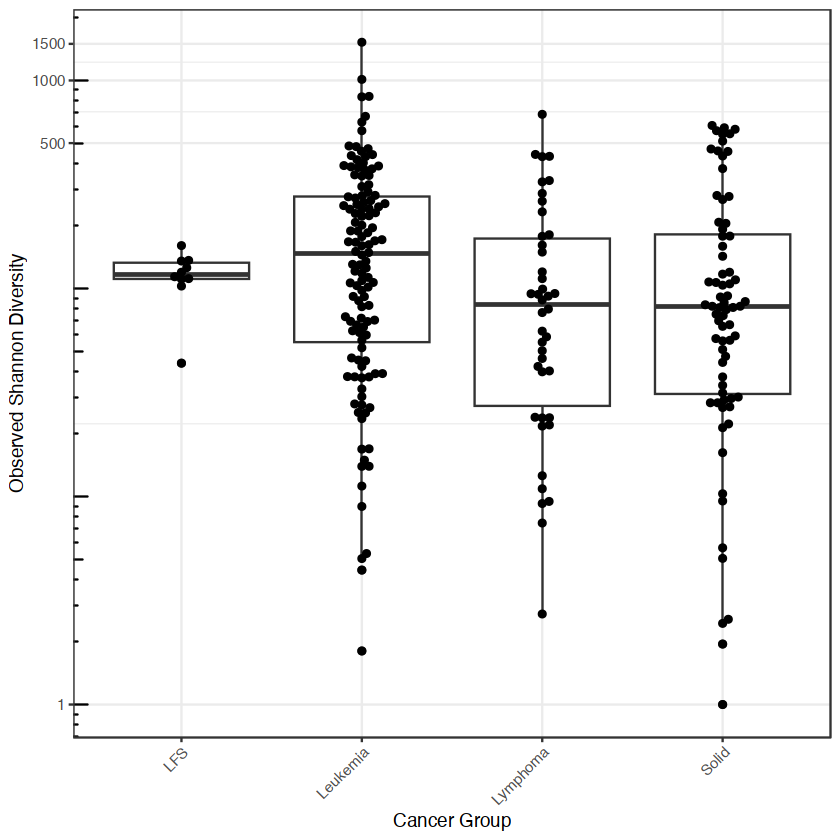

In [56]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
ggplot( pbmc, 
aes(x = cancergroup, y = observed_Shannon))  +
  geom_boxplot() +
  geom_beeswarm() +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Cancer Group", y = "Observed Shannon Diversity") +
              annotation_logticks(sides = "l") +
            scale_y_continuous(
                 trans = "log10",
                  breaks = c(1, 500 , 1000, 1500),
                  label = c(1, 500, 1000, 1500)
            )


In [24]:
pairwise.t.test( log10(pbmc$observed_Shannon), pbmc$cancergroup, p.adj = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  log10(pbmc$observed_Shannon) and pbmc$cancergroup 

         LFS   Leukemia Lymphoma
Leukemia 0.928 -        -       
Lymphoma 0.304 0.030    -       
Solid    0.318 0.014    0.899   

P value adjustment method: none 

In [ ]:
  scale_fill_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid")]) +


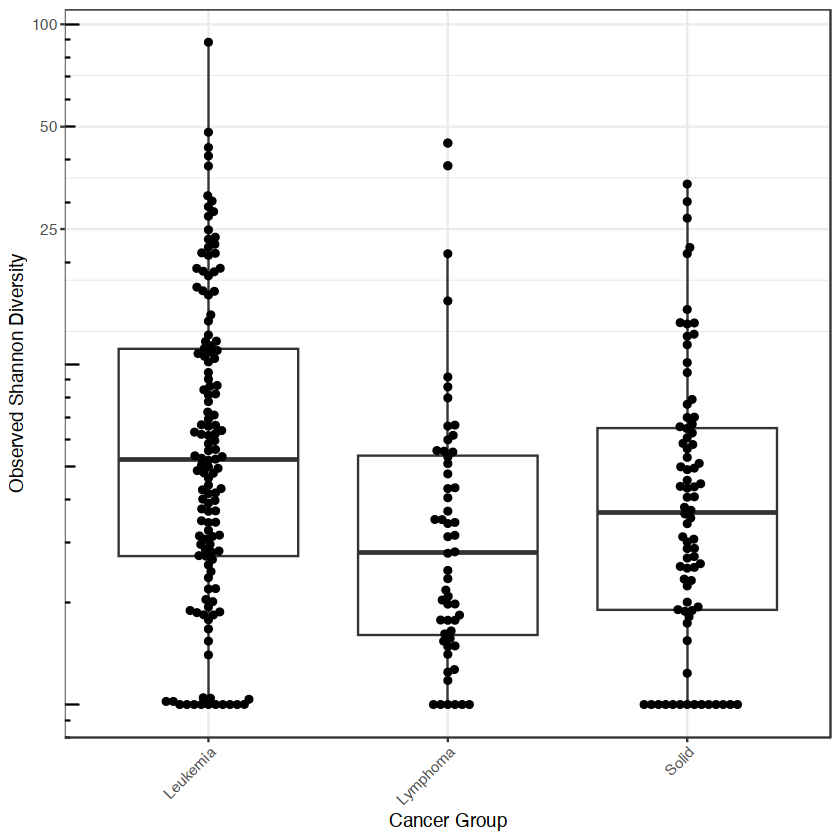

In [28]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
ggplot(cfdna, 
aes(x = cancergroup, y = observed_Shannon)) +
  geom_boxplot() +
  geom_beeswarm() +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Cancer Group", y = "Observed Shannon Diversity") +
              annotation_logticks(sides = "l") +
            scale_y_continuous(
                  trans = "log10",
                  breaks = c(0.1, 25, 50, 100),
                  label = c(0.1, 25, 50, 100)
            )


In [29]:
pairwise.t.test( log10(cfdna$observed_Shannon), cfdna$cancergroup, p.adj = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  log10(cfdna$observed_Shannon) and cfdna$cancergroup 

         Leukemia Lymphoma
Lymphoma 0.00031  -       
Solid    0.00536  0.29006 

P value adjustment method: none 

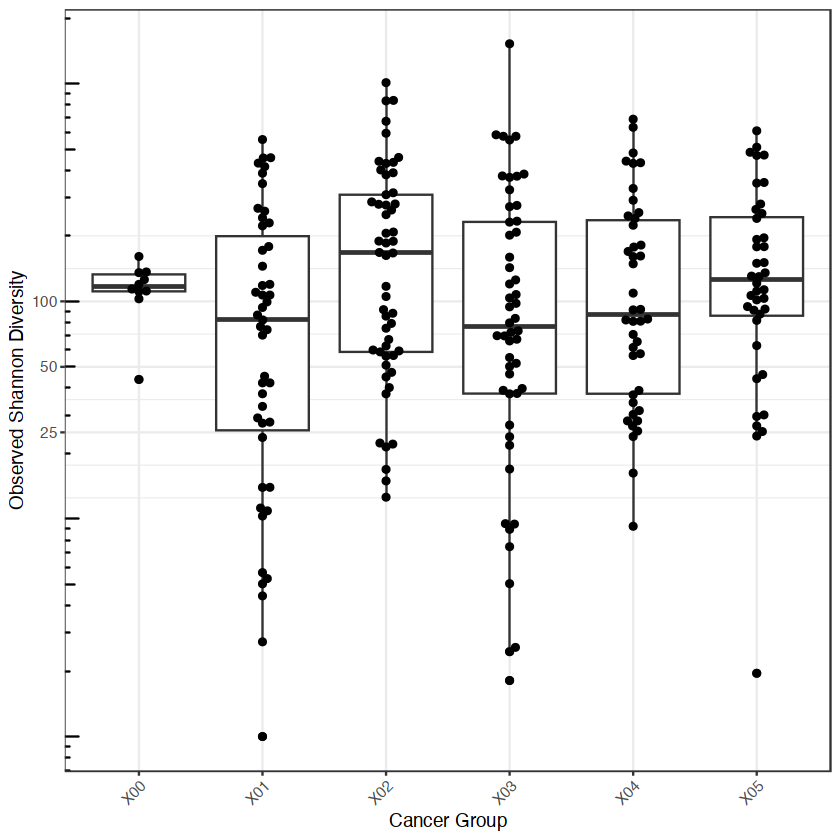

In [31]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
ggplot(pbmc, 
aes(x = cycle, y = observed_Shannon)) +
  geom_boxplot() +
  geom_beeswarm() +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = "Cancer Group", y = "Observed Shannon Diversity") +
              annotation_logticks(sides = "l") +
            scale_y_continuous(
                  trans = "log10",
                  breaks = c(0.1, 25, 50, 100),
                  label = c(0.1, 25, 50, 100)
            )


In [59]:
colnames(pbmc)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Na<U+00EF>ve"       "SCM"                "TE"                
[16] "EM."                "CM."                "Na<U+00EF>ve."     
[19] "SCM."               "TE."                "Na<U+00EF>ve.TE"   
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"

In [62]:
table(pbmc$Disease_type)


  ALCL    ALL    AML   ARMS     BL    BLL    CML  DLBCL   ERMS    EWS     HB 
     4     49     25      2     10      4      7      5     11     21      9 
    HD HR ALL    LFS     NB     OS  PMBCL SR ALL  T-ALL  WILMS 
    16     29     10      5     22      3      4      6      2 

In [67]:
unique(meta_div$Patient[ meta_div$Disease_type == "NB"])

[1] "CHP_346" "CHP_385" "CHP_418" "CHP_379"

In [33]:
pairwise.t.test( log10(pbmc$observed_Shannon), pbmc$cycle, p.adj = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  log10(pbmc$observed_Shannon) and pbmc$cycle 

    X00    X01    X02    X03    X04   
X01 0.1539 -      -      -      -     
X02 0.6957 0.0018 -      -      -     
X03 0.3387 0.4071 0.0177 -      -     
X04 0.7807 0.0607 0.2604 0.2626 -     
X05 0.9209 0.0139 0.6339 0.0830 0.5471

P value adjustment method: none 

In [43]:
table(pbmc$cycle)


X00 X01 X02 X03 X04 X05 
 10  47  53  52  42  40 

In [44]:
log10(pbmc$observed_Shannon[ pbmc$cycle == "X01"])

[1] 1.4643256 2.0290224 1.8447380 1.1452897 2.0781885 1.1449787 2.2346261
 [8] 0.7016543 1.0501090 2.3840719 1.8842685 2.0417045 2.7436759 1.9146023
[15] 1.5172487 1.9971722 1.4401531 2.2519593 2.5888463 1.0373070 2.6353007
[22] 0.4352071 2.3471133 2.0729847 2.6600777 2.6589029 0.6463057 0.0000000
[29] 2.3605555 2.1614848 1.3744367 1.8697244 2.4276597 1.5753033 1.0133429
[36] 1.9371667 1.6558393 2.4144770 1.6253022 1.4449967 0.7534298 1.9718323
[43] 2.5409823 0.7259116 2.0288558 2.6192228 1.6254051

In [45]:
pbmc$Disease[pbmc$cycle == "X01"]

[1] "NB"     "ALL"    "OS"     "CML"    "HB"     "HR ALL" "AML"    "AML"   
 [9] "HR ALL" "AML"    "HD"     "OS"     "EWS"    "OS"     "ALL"    "HD"    
[17] "HR ALL" "ARMS"   "AML"    "ALCL"   "BL"     "BL"     "ALL"    "HR ALL"
[25] "ALL"    "EWS"    "T-ALL"  "ERMS"   "HR ALL" "ALL"    "HR ALL" "ERMS"  
[33] "ERMS"   "CML"    "OS"     "EWS"    "ALL"    "HR ALL" "BLL"    "AML"   
[41] "HB"     "HD"     "ALL"    "ALL"    "NB"     "ALL"    "ALL"

In [47]:
pairwise.wilcox.test( log10(pbmc$observed_Shannon[ pbmc$cycle == "X02"]), 
pbmc$Disease[pbmc$cycle == "X02"], 
p.adj = "none")


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  log10(pbmc$observed_Shannon[pbmc$cycle == "X02"]) and pbmc$Disease[pbmc$cycle == "X02"] 

       ALCL  ALL   AML   BL    BLL   CML   DLBCL ERMS  EWS   HB    HD    HR ALL
ALL    0.364 -     -     -     -     -     -     -     -     -     -     -     
AML    0.667 0.165 -     -     -     -     -     -     -     -     -     -     
BL     0.667 0.061 0.095 -     -     -     -     -     -     -     -     -     
BLL    1.000 0.545 1.000 0.667 -     -     -     -     -     -     -     -     
CML    0.667 0.909 0.381 0.333 0.667 -     -     -     -     -     -     -     
DLBCL  0.667 0.758 0.381 0.333 0.667 0.667 -     -     -     -     -     -     
ERMS   1.000 0.727 0.333 0.667 1.000 1.000 1.000 -     -     -     -     -     
EWS    0.667 0.594 0.222 0.190 0.667 0.857 0.857 1.000 -     -     -     -     
HB     1.000 0.364 0.857 0.333 1.000 0.667 0.667 0.667 0.190 -     -     -     
HD     0.500 0.287 0.036 0.200 0.500 1.000 